In [2]:
# Building a voting classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
X, y = make_moons()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((80L, 2L), (80L,), (20L, 2L), (20L,))


In [4]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
        estimators=[('lr', log_clf), ('rf',	rnd_clf), ('svc', svm_clf)],
        voting='hard'
    ) 
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='hard', weights=None)

In [5]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred)) 

('LogisticRegression', 0.90000000000000002)
('RandomForestClassifier', 0.94999999999999996)
('SVC', 0.90000000000000002)
('VotingClassifier', 0.90000000000000002)


In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=80, bootstrap=True,n_jobs=-1
    )
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [7]:
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True
)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.94999999999999996

In [8]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)
# Go to slide

0.90000000000000002

In [9]:
#following code trains a RandomForestclassifier with 500 trees(each limited to maximum 16 nodes), using all CPU cores:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1) 
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.90000000000000002

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)
# Go to slide

('sepal length (cm)', 0.098374690537116311)
('sepal width (cm)', 0.026048816021454115)
('petal length (cm)', 0.41325757582911177)
('petal width (cm)', 0.46231891761231803)


In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R",
                             learning_rate=0.5) 
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

# PCA

In [1]:
import numpy as np
X = np.random.randn(5, 3)
X_centered = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:, 0]
c2 = V.T[:,	1]
print("X:{0} \n\n C1:{1} \n\n C2:{2}".format(X, c1, c2))
# Go to slide

X:[[ 1.68666247  0.00314304  0.58908717]
 [ 0.94541302  1.16391345 -0.18154195]
 [ 0.96464984 -1.09060035  1.26285788]
 [-0.63305698  1.13362833 -1.14527477]
 [-0.40029623 -1.21090228 -0.07163133]] 

 C1:[-0.41671624  0.66689655 -0.61773503] 

 C2:[ 0.75867893  0.62948663  0.16778817]


In [2]:
W2 = V.T[:, :2] 
X2D = X_centered.dot(W2)
print(X2D)

[[-0.79488631  0.97638502]
 [ 0.76416276  1.01540169]
 [-1.63963739 -0.14683683]
 [ 1.99707133 -0.36291728]
 [-0.3267104  -1.4820326 ]]


In [3]:
# Using scikit learn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
print(X2D)

[[-0.79488631 -0.97638502]
 [ 0.76416276 -1.01540169]
 [-1.63963739  0.14683683]
 [ 1.99707133  0.36291728]
 [-0.3267104   1.4820326 ]]


In [4]:
pca.components_

array([[-0.41671624,  0.66689655, -0.61773503],
       [-0.75867893, -0.62948663, -0.16778817]])

In [5]:
pca.explained_variance_ratio_

array([ 0.64189187,  0.34778298])

In [6]:
# Choosing right number of dimensions
X = np.random.randn(20, 7)
X = np.append(X, np.zeros([20, 3]), axis=1)
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
var = pca.explained_variance_ratio_
print(var, d)
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X)

(array([ 0.30068871,  0.25101727,  0.17531633,  0.11825618,  0.0831394 ,
        0.04859839,  0.02298373,  0.        ,  0.        ,  0.        ]), 6)


In [7]:
pca2 = PCA(n_components=0.95)
X_reduced = pca2.fit_transform(X)
print(X_reduced)

[[ 0.85022263  1.5484234  -0.82528531  0.64721103 -0.21070343 -0.50888155]
 [-0.05591302  0.31089979 -1.27967769 -0.27241967  0.10586583 -0.25020597]
 [ 0.66844676  1.45327657 -0.45279947  1.04393738  2.10480349  0.24047372]
 [-0.23094765 -1.97415411  0.36546028  0.06874723  0.93868198 -0.03593818]
 [-3.42804758  3.02963117  1.21694805 -0.53091746 -0.07234086 -0.18778582]
 [-1.11817373 -0.64585889  2.09494441 -0.55006037 -0.69448103  1.50984535]
 [ 1.15225454 -1.42648506  0.31331665 -1.27445549  0.69653595  0.03295422]
 [-2.77988708 -1.13012922 -0.52023993  2.26222608  0.56844165 -0.62781643]
 [-1.55272926 -0.9263473  -1.7069715  -0.03023196 -0.57808682  0.11974582]
 [ 0.95654983 -0.17158238  0.60259533 -0.60178359 -0.09450117 -0.89149158]
 [ 1.14838665  1.32877408 -0.11982654  0.47177012 -1.82463498  0.13099196]
 [ 1.39510148  1.44673454 -2.30445628 -1.11618339 -0.00952125  0.1257625 ]
 [ 0.99932951  2.48703164  2.54012106  0.00568869  0.6905331  -0.18594664]
 [ 1.07035829 -1.52790942

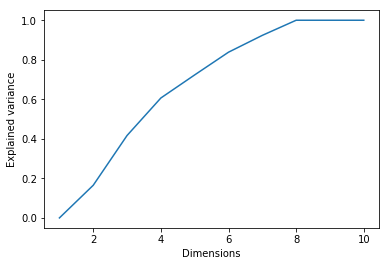

In [9]:
from matplotlib import pyplot as plt
plt.plot([i+1 for i in range(var.shape[0])], (np.max(var) - var)/np.max(var))
plt.xlabel("Dimensions")
plt.ylabel("Explained variance")
plt.show()

In [10]:
# PCA for Compression 
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X_mnist = mnist.data
X_mnist.shape

(70000L, 784L)

In [11]:
pca = PCA(n_components = 0.95)
X_mnist_reduced = pca.fit_transform(X_mnist) 
X_mnist_recovered = pca.inverse_transform(X_mnist_reduced)
print("Reduced matrix shape:{0} \n Recovered matrix shape:{1}".format(X_mnist_reduced.shape, X_mnist_recovered.shape))

Reduced matrix shape:(70000L, 154L) 
 Recovered matrix shape:(70000L, 784L)


In [14]:
# Incremental PCA to split training set into batches for PCA
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_mnist, n_batches):
    inc_pca.partial_fit(X_batch)
X_mnist_reduced_inc = inc_pca.transform(X_mnist)
print("Reduced matrix shape:{0}\nNormal PCA components:{1}\nInc PCA components:{2}".
      format(X_mnist_reduced_inc.shape, pca.components_, inc_pca.components_))

Reduced matrix shape:(70000L, 154L)
Normal PCA components:[[  4.63140573e-19   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.81016245e-19  -2.77555756e-17  -6.93889390e-17 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  4.18487201e-19   0.00000000e+00   1.11022302e-16 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  2.30881685e-18   2.25514052e-16  -7.28583860e-17 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -6.37736910e-19   7.97972799e-17  -2.77555756e-17 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]
 [ -2.47471794e-18  -2.42861287e-17   3.71230824e-16 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
Inc PCA components:[[  4.41597720e-18   2.77555756e-16  -2.66453526e-15 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]
 [ -3.33647272e-18  -1.24900090e-16   7.77156117e-16 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]
 [ -2.95382658e-17 

In [16]:
# Randomized PCA- computational complexity is O(m × d2) + O(d3), instead of O(m × n2) + O(n3)
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_mnist)
print(X_reduced.shape)

(70000L, 154L)


In [ ]:
# Go to slide